<a href="https://colab.research.google.com/github/Suryaghorui2002/Sms-Spam-Detection-System/blob/main/sms_spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /content/kaggle.json

In [ ]:
!kaggle datasets download uciml/sms-spam-collection-dataset

Dataset URL: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
License(s): unknown
sms-spam-collection-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip sms-spam-collection-dataset.zip

Archive:  sms-spam-collection-dataset.zip
replace spam.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
df=pd.read_csv('/content/spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4593,ham,I had a good time too. Its nice to do somethin...,NaN,NaN,NaN
1864,ham,You call him now ok i said call him,NaN,NaN,NaN
1516,ham,I need to come home and give you some good lov...,NaN,NaN,NaN
2249,spam,"Thanks for your ringtone order, ref number R83...",NaN,NaN,NaN
1591,ham,That's my honeymoon outfit. :),NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
df.sample(5)

,v1,v2
2144,spam,FreeMsg: Hey - I'm Buffy. 25 and love to satis...
3507,ham,"Camera quite good, 10.1mega pixels, 3optical a..."
2924,ham,Are you coming to day for class.
743,ham,Ok. There may be a free gym about.
3797,ham,"Feb &lt;#&gt; is \I LOVE U\"" day. Send dis t..."


In [ ]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1948,ham,I cant pick the phone right now. Pls send a me...
2176,ham,get ready to moan and scream :)
3768,ham,Was gr8 to see that message. So when r u leavi...
4728,ham,I've reached already.
623,ham,"sorry, no, have got few things to do. may be i..."


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [ ]:
df['target']=encoder.fit_transform(df['target'])

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#missing value chack
df.isnull().sum()

,0
target,0
text,0


In [ ]:
#chack duplicate value
df.duplicated().sum()

np.int64(403)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(5169, 2)

In [ ]:
df['target'].value_counts()

,count
target,
0,4516
1,653


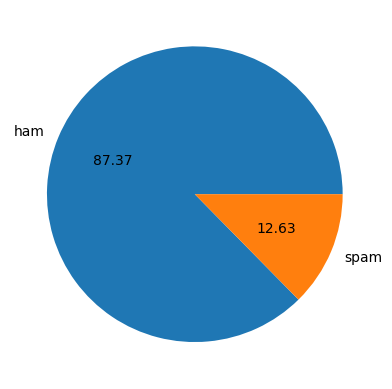

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

# data imbalance


In [ ]:
import nltk

In [ ]:
!pip install nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['num_characters']=df['text'].apply(len)

In [ ]:
df.head(5)

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#no of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
df['sentece']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,target,text,num_characters,num_words,sentece
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[['num_characters','num_words','sentece']].describe()


,num_characters,num_words,sentece
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df['target'] == 1][['num_characters','num_words','sentece']].describe()

,num_characters,num_words,sentece
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
df[df['target'] == 0][['num_characters','num_words','sentece']].describe()

,num_characters,num_words,sentece
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
import seaborn as sns

In [ ]:
df[df['target'] == 0][['num_characters','num_words','sentece']].describe()
df[df['target'] == 1][['num_characters','num_words','sentece']].describe()

,num_characters,num_words,sentece
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: ylabel='Count'>

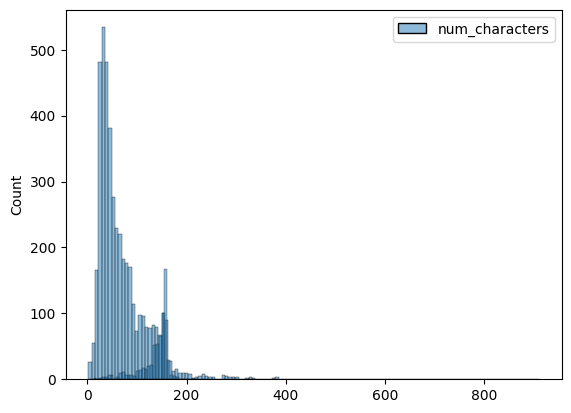

In [ ]:
sns.histplot(df[df['target'] == 0][['num_characters']])
sns.histplot(df[df['target'] == 1][['num_characters']],color='yellow')

data preprocessing


In [ ]:
import joblib
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
stopwords_set = stopwords.words('english')

def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords_set and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [ ]:
from nltk.corpus import stopwords
stopwords_set = stopwords.words('english')
print(stopwords_set)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
transform_text("Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...")

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [ ]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
df['transform_text']=df['text'].apply(transform_text)

In [ ]:
df.head(10)

,target,text,num_characters,num_words,sentece,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...
6,0,Even my brother is not like to speak with me. ...,77,18,2,even brother like speak treat like aid patent
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2,per request mell oru minnaminungint nurungu ve...
8,1,WINNER!! As a valued network customer you have...,158,32,5,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...


In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')


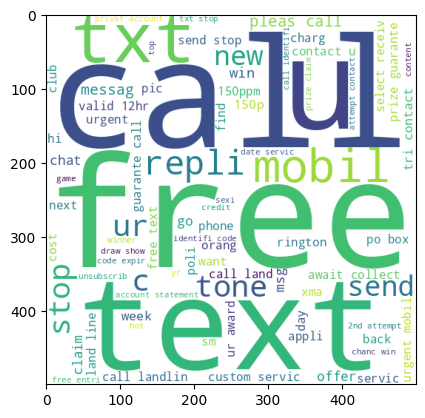

In [ ]:
spam_wc=wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=" "))
plt.imshow(spam_wc)


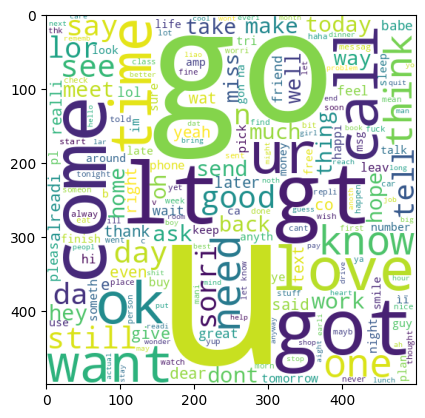

In [ ]:
ham_wc=wc.generate(df[df['target']==0]['transform_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [ ]:
spam_corpus=[]
for msg in df[df['target']==1]['transform_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)
print(word)

minut


In [ ]:
len(spam_corpus)

9939

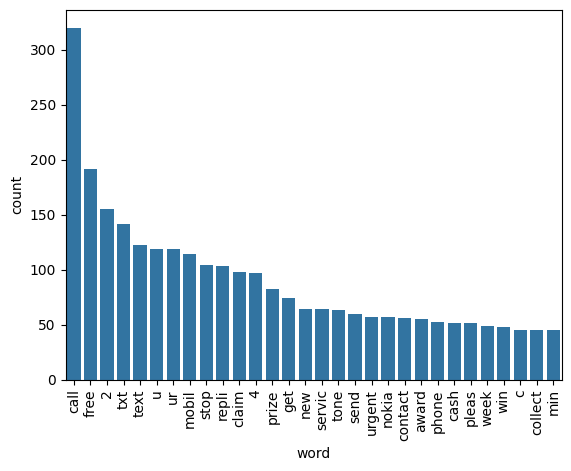

In [ ]:
from collections import Counter
word_counts = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=word_counts)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
ham_corpus=[]
for msg in df[df['target']==0]['transform_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)
print(word)

name


In [ ]:
len(ham_corpus)

35404

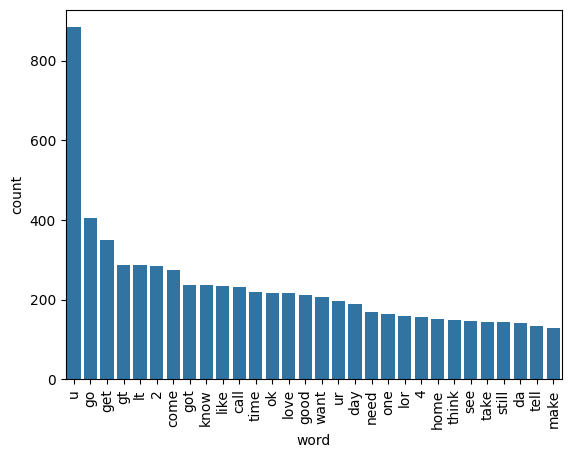

In [ ]:
from collections import Counter
word_counts = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=word_counts)
plt.xticks(rotation='vertical')
plt.show()

MODEL BILDING


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [ ]:
x=cv.fit_transform(df['text']).toarray()

In [ ]:
x.shape

(5169, 8672)

In [ ]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)

In [ ]:
y=df['target'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gNB=GaussianNB()
mNB=MultinomialNB()
bNB=BernoulliNB()

In [ ]:
gNB.fit(x_train,y_train)
y_pred1=gNB.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9148936170212766
[[824  72]
 [ 16 122]]
0.6288659793814433


In [ ]:
mNB.fit(x_train,y_train)
y_pred2=mNB.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9816247582205029
[[886  10]
 [  9 129]]
0.9280575539568345


In [ ]:
bNB.fit(x_train,y_train)
y_pred3=bNB.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9777562862669246
[[893   3]
 [ 20 118]]
0.9752066115702479


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc= SVC(kernel='sigmoid',gamma=1.0)
knc= KNeighborsClassifier()
dtc= DecisionTreeClassifier(max_depth=5)
lrc= LogisticRegression(solver='liblinear',penalty='l1')
rfc= RandomForestClassifier(n_estimators=50,random_state=2)
abc= AdaBoostClassifier(n_estimators=50,random_state=2)
bc= BaggingClassifier(n_estimators=50,random_state=2)
etc= ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt= GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb= XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs={
    'svc': svc,
    'knc': knc,
    'dtc': dtc,
    'lrc': lrc,
    'rfc': rfc,
    'abc': abc,
    'bc': bc,
    'etc': etc,
    'gbdt': gbdt,
    'xgb': xgb
}

In [ ]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
  clf.fit(x_train,y_train)
  y_pred=clf.predict(x_test)
  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)

  return accuracy,precision

In [ ]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9738878143133463, 0.9586776859504132)

In [ ]:
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
  current_accuracy,current_precision=train_classifier(clf,x_train,y_train,x_test,y_test)
  print("for",name)
  print("accuracy is",current_accuracy)
  print("precision is",current_precision)
  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

for svc
accuracy is 0.9738878143133463
precision is 0.9586776859504132
for knc
accuracy is 0.9013539651837524
precision is 1.0
for dtc
accuracy is 0.941972920696325
precision is 0.8545454545454545
for lrc
accuracy is 0.9796905222437138
precision is 0.9915966386554622
for rfc
accuracy is 0.9700193423597679
precision is 1.0
for abc
accuracy is 0.9410058027079303
precision is 0.8888888888888888
for bc
accuracy is 0.9671179883945842
precision is 0.9
for etc
accuracy is 0.9777562862669246
precision is 1.0
for gbdt
accuracy is 0.9497098646034816
precision is 0.9387755102040817
for xgb
accuracy is 0.9787234042553191
precision is 0.9603174603174603


In [ ]:
performance_df = pd.DataFrame({'accuracy': accuracy_scores, 'precision': precision_scores}, index=clfs.keys())
performance_df = performance_df.sort_values('precision',ascending=False)
performance_df = performance_df.rename_axis('Algorithm Name')

In [ ]:
performance_df

,accuracy,precision
Algorithm Name,,
knc,0.901354,1.000000
rfc,0.970019,1.000000
etc,0.977756,1.000000
lrc,0.979691,0.991597
xgb,0.978723,0.960317
svc,0.973888,0.958678
gbdt,0.949710,0.938776
bc,0.967118,0.900000
abc,0.941006,0.888889


In [ ]:
# Create a sample DataFrame to merge with performance_df
data = {'Algorithm Name': ['knc', 'rfc', 'etc', 'lrc', 'xgb', 'svc', 'gbdt', 'bc', 'abc', 'dtc'],
        'temp_column': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
temp_df = pd.DataFrame(data)
# Merge performance_df with temp_df on 'Algorithm Name'
merged_df = performance_df.merge(temp_df, on='Algorithm Name')

# Display the merged DataFrame
display(merged_df)

,Algorithm Name,accuracy,precision,temp_column
0,knc,0.901354,1.000000,1
1,rfc,0.970019,1.000000,2
2,etc,0.977756,1.000000,3
3,lrc,0.979691,0.991597,4
4,xgb,0.978723,0.960317,5
5,svc,0.973888,0.958678,6
6,gbdt,0.949710,0.938776,7
7,bc,0.967118,0.900000,8
8,abc,0.941006,0.888889,9
9,dtc,0.941973,0.854545,10


In [ ]:
#voting classifier
svc= SVC(kernel='sigmoid',gamma=1.0)
knc= KNeighborsClassifier()
dtc= DecisionTreeClassifier(max_depth=5)
lrc= LogisticRegression(solver='liblinear',penalty='l1')
from sklearn.ensemble import VotingClassifier

In [ ]:
voting=VotingClassifier(estimators=[('svc',svc),('knc',knc),('dtc',dtc),('lrc',lrc)],voting='hard')
final_estimator=RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
clf=StackingClassifier(estimators=[('svc',svc),('knc',knc),('dtc',dtc),('lrc',lrc)],final_estimator=final_estimator)

In [ ]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('svc', SVC(gamma=1.0, kernel='sigmoid')),
                             ('knc', KNeighborsClassifier()),
                             ('dtc', DecisionTreeClassifier(max_depth=5)),
                             ('lrc',
                              LogisticRegression(penalty='l1',
                                                 solver='liblinear'))])

In [ ]:
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("accuracy",accuracy_score(y_test,y_pred))
print("precision",precision_score(y_test,y_pred))

accuracy 0.9796905222437138
precision 0.9606299212598425


In [ ]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize and fit the vectorizer on the training data
# Assuming df['text'] contains the training data used for the model
tfidf = TfidfVectorizer(max_features=3000) # Using max_features as in cell kyrXD6AIG9_k
x = tfidf.fit_transform(df['text']).toarray() # Fit the vectorizer here

# Save the fitted vectorizer
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mNB,open('model.pkl','wb'))

In [ ]:
import pickle

# Load the vectorizer and model
tfidf = pickle.load(open('vectorizer.pkl', 'rb'))
model = pickle.load(open('model.pkl', 'rb'))


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import pickle

# Corrected training data (all entries are strings)
training_data = [
    "WINNER! You have won a free iPhone! Click here to claim your prize.",
    "Hi, let's meet tomorrow at 10 AM.",
    "Claim your free gift now!",
    "Can we discuss the project details?",
    "Congratulations! You've won a $1000 gift card!",
    "Let's schedule a meeting for next week.",
    "Free trial! Sign up now to get exclusive offers!",
    "Please review the attached document."
]
labels = [1, 0, 1, 0, 1, 0, 1, 0]  # 1 = spam, 0 = not spam

# Initialize and fit the vectorizer
tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(training_data)

# Check feature count
print(f"Number of features: {X_train.shape[1]}")  # Will likely be < 8672 with this small dataset

# Train the model
model = MultinomialNB()
model.fit(X_train, labels)

# Save the vectorizer and model
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

Number of features: 46


In [ ]:
import pickle

tfidf = pickle.load(open('vectorizer.pkl', 'rb'))
if hasattr(tfidf, 'vocabulary_'):
    print("Vectorizer is fitted.")
else:
    print("Vectorizer is not fitted.")

Vectorizer is fitted.


In [ ]:
# Get user input for a new message
input_sms = input("Enter the message to check for spam:")

# Transform the input message
transformed_sms = transform_text_for_prediction(input_sms)

# Vectorize the transformed message
vector_input = tfidf.transform([transformed_sms])

# Make a prediction
result = model.predict(vector_input)[0]

# Output the prediction
if result == 1:
    print("Spam")
else:
    print("Not Spam")

Enter the message to check for spam:my MOdel is ready


In [ ]:
# Save the model and vectorizer
joblib.dump(model, 'model.pkl')
joblib.dump(tfidf, 'vectorizer.pkl')

['vectorizer.pkl']

In [ ]:
!ls /content/

kaggle.json  sample_data		      spam.csv
model.pkl    sms-spam-collection-dataset.zip  vectorizer.pkl


In [ ]:
from google.colab import files
files.download('/content/vectorizer.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('/content/model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import joblib
loaded_model = joblib.load('/content/model.pkl')
print("Model loaded successfully!")

Model loaded successfully!


In [ ]:
df.head()

,target,text,num_characters,num_words,sentece,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
# Filter the DataFrame to show only spam messages
spam_messages = df[df['target'] == 1]
display(spam_messages)

,target,text,num_characters,num_words,sentece,transform_text
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...
8,1,WINNER!! As a valued network customer you have...,158,32,5,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",136,31,3,six chanc win cash 100 pound txt csh11 send co...
...,...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,90,18,3,want explicit sex 30 sec ring 02073162414 cost...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,160,38,6,ask 3mobil 0870 chatlin inclu free min india c...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,160,35,5,contract mobil 11 mnth latest motorola nokia e...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,147,30,1,remind o2 get pound free call credit detail gr...
